In [11]:
import pandas as pd

df = pd.read_csv("Airbnb_Open_Data.csv", sep=",", encoding="english", quotechar='"', doublequote=True, on_bad_lines='skip', engine='python')
print(df.shape)
print(df.head())

LookupError: unknown encoding: english

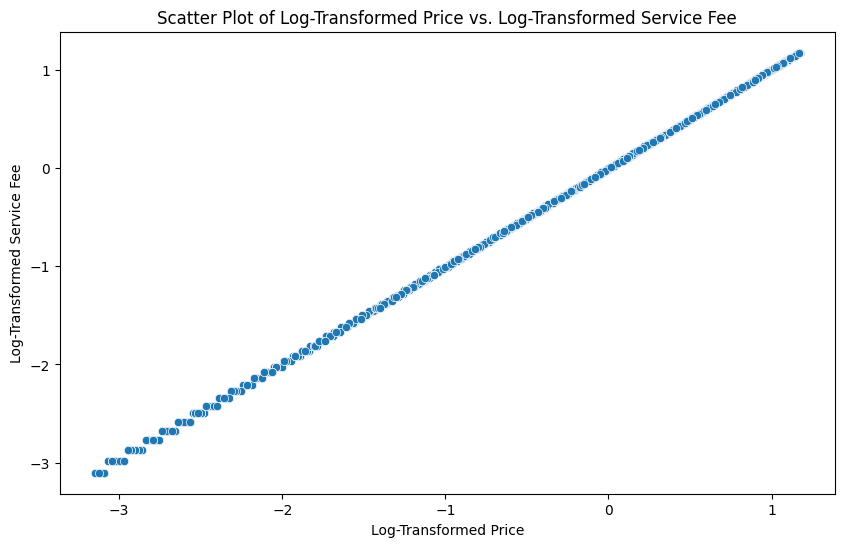

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_log', y='service_fee_log', data=df)
plt.title('Scatter Plot of Log-Transformed Price vs. Log-Transformed Service Fee')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Log-Transformed Service Fee')
plt.show()

# Task
Clean the dataframe `df`.

## Inspect data

### Subtask:
Display the first few rows of the dataframe and check the data types and non-null counts of each column.


**Reasoning**:
The previous attempt to read the CSV failed due to an unknown encoding. The `df` variable currently contains binary data, not a DataFrame. I need to read the CSV file correctly using a standard encoding like 'utf-8' or 'latin-1' and then display the head and info of the correctly loaded dataframe as requested by the subtask.



In [12]:
df = pd.read_csv("Airbnb_Open_Data.csv", sep=",", encoding="latin-1", quotechar='"', doublequote=True, on_bad_lines='skip', engine='python')
print(df.head())
print(df.info())

                                                   PK     ! bîh^     [Content_Types].xml ¢(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ¬ËNÃ0E÷HüCä-JÜ²@5íÇ*Q>ÀÄÆªc[iiÿûB¡j7±ÏÜ{2ñÍh²nm¶Æ»RÈÀU^7/ÅÇì%¿rZYï @1__f q·ÃR4DáAJ¬h>ãÚÇVßÆ¹ªZ¨9ÈÛÁàNVÞ8Ê©ÓãÑÔji){^óã-I"{Üv^¥P!XS)bR¹rúK¾s(¸3Õ`cÞ0½ÝÎß»¾7M4²©ôªZÆk+¿|\|z¿(ôPúº6h_-[@!ÒØ Pk´­2nÏ}Ä?£LËðÂ Ýû%áÄßdºdN"m  \
?9LìÒÈsbgÙ®|Èl!õùUSh9i°br:"y_dlÀóD¿ý|-N...                                                

## Inspect data

### Subtask:
Retry displaying the first few rows of the dataframe and check the data types and non-null counts of each column.


**Reasoning**:
Attempt to read the CSV file without specifying an encoding, then display the head and info if successful.



In [13]:
try:
    df = pd.read_csv("Airbnb_Open_Data.csv", sep=",", quotechar='"', doublequote=True, on_bad_lines='skip', engine='python')
    print(df.head())
    print(df.info())
except Exception as e:
    print(f"Failed to read with inferred encoding: {e}")
    try:
        df = pd.read_csv("Airbnb_Open_Data.csv", sep=",", encoding='utf-8', quotechar='"', doublequote=True, on_bad_lines='skip', engine='python')
        print(df.head())
        print(df.info())
    except Exception as e:
        print(f"Failed to read with utf-8 encoding: {e}")
        try:
            df = pd.read_csv("Airbnb_Open_Data.csv", sep=",", encoding='ISO-8859-1', quotechar='"', doublequote=True, on_bad_lines='skip', engine='python')
            print(df.head())
            print(df.info())
        except Exception as e:
            print(f"Failed to read with ISO-8859-1 encoding: {e}")


Failed to read with inferred encoding: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte
Failed to read with utf-8 encoding: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte
                                                   PK     ! bîh^     [Content_Types].xml ¢(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ¬ËNÃ0E÷HüCä-JÜ²@5íÇ*Q>ÀÄÆªc[iiÿûB¡j7±ÏÜ{2ñÍh²nm¶Æ»RÈÀU^7/ÅÇì%¿rZYï @1__f q·ÃR4DáAJ¬h>ãÚÇVßÆ¹ªZ¨9ÈÛÁàNVÞ8Ê©ÓãÑÔji

**Reasoning**:
Since none of the standard encodings worked and the output shows signs of being a zip file, this file is likely not a plain CSV. Given the file name "Airbnb_Open_Data.csv", it's highly probable that this is an Excel file saved with a `.csv` extension or a zipped CSV. As pandas can read Excel files directly, I will try reading it as an Excel file.



In [14]:
try:
    df = pd.read_excel("Airbnb_Open_Data.csv")
    print(df.head())
    print(df.info())
except Exception as e:
    print(f"Failed to read as Excel file: {e}")


        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United S

## Handle missing values

### Subtask:
Identify and address missing values, either by dropping rows/columns or imputing values.


**Reasoning**:
Calculate and display the number and percentage of missing values for each column in the DataFrame `df`.



In [15]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
})

print("Missing values per column:")
print(missing_info)

Missing values per column:
                                Missing Values  Percentage
id                                           0    0.000000
NAME                                       270    0.263160
host id                                      0    0.000000
host_identity_verified                     289    0.281679
host name                                  408    0.397665
neighbourhood group                         29    0.028265
neighbourhood                               16    0.015595
lat                                          8    0.007797
long                                         8    0.007797
country                                    532    0.518524
country code                               131    0.127682
instant_bookable                           105    0.102340
cancellation_policy                         76    0.074075
room type                                    0    0.000000
Construction year                          214    0.208579
price                        

**Reasoning**:
Drop columns with a high percentage of missing values ('license' and 'house_rules') and then drop rows with missing values in remaining columns, as the percentage of missing values is low for most columns.



In [16]:
df = df.drop(columns=['license', 'house_rules'])
df = df.dropna()
missing_values_after_cleaning = df.isnull().sum()
print("\nMissing values per column after cleaning:")
print(missing_values_after_cleaning)


Missing values per column after cleaning:
id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64


## Address data types

### Subtask:
Convert columns to appropriate data types if necessary (e.g., convert object types to numeric or datetime).


**Reasoning**:
Inspect the data types of the DataFrame columns to identify columns that need conversion.



In [17]:
print(df.dtypes)

id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                         float64
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                    float64
service fee                              float64
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month   

## Handle duplicates

### Subtask:
Identify and remove duplicate rows if they exist.


**Reasoning**:
Check for duplicate rows in the DataFrame and print the number of duplicates found.



In [18]:
duplicate_rows_before = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_rows_before}")

Number of duplicate rows before removal: 466


**Reasoning**:
Remove duplicate rows from the DataFrame and verify that no duplicates remain.



In [19]:
df = df.drop_duplicates()
duplicate_rows_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after}")

Number of duplicate rows after removal: 0


## Address outliers

### Subtask:
Identify and handle outliers in numerical columns if necessary.


**Reasoning**:
Identify numerical columns and visualize their distributions using box plots to identify potential outliers.



Numerical columns: ['id', 'host id', 'lat', 'long', 'instant_bookable', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


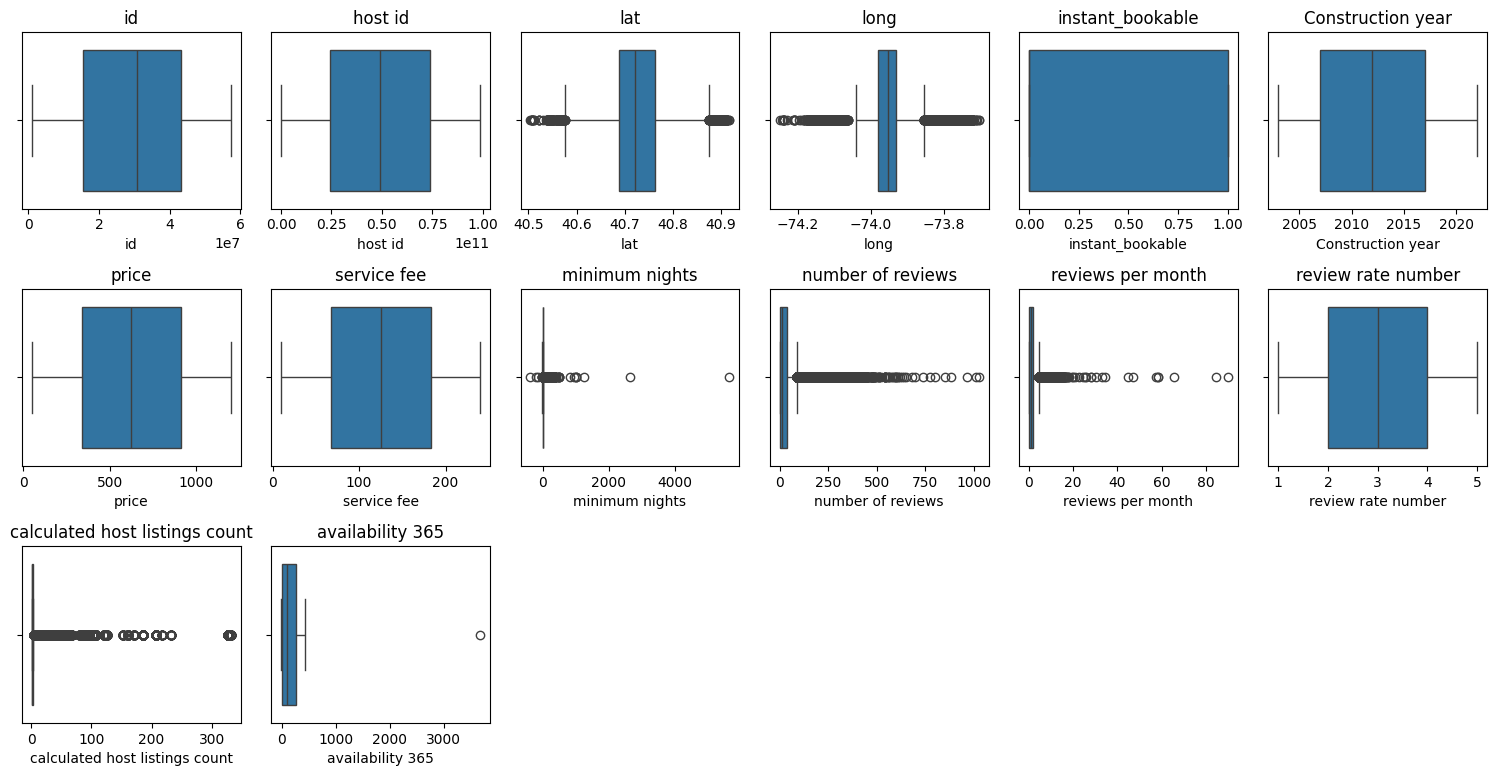

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns

print(f"Numerical columns: {list(numerical_cols)}")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

**Reasoning**:
Handle outliers in the 'price', 'service fee', and 'minimum nights' columns by capping them using the Interquartile Range (IQR) method.



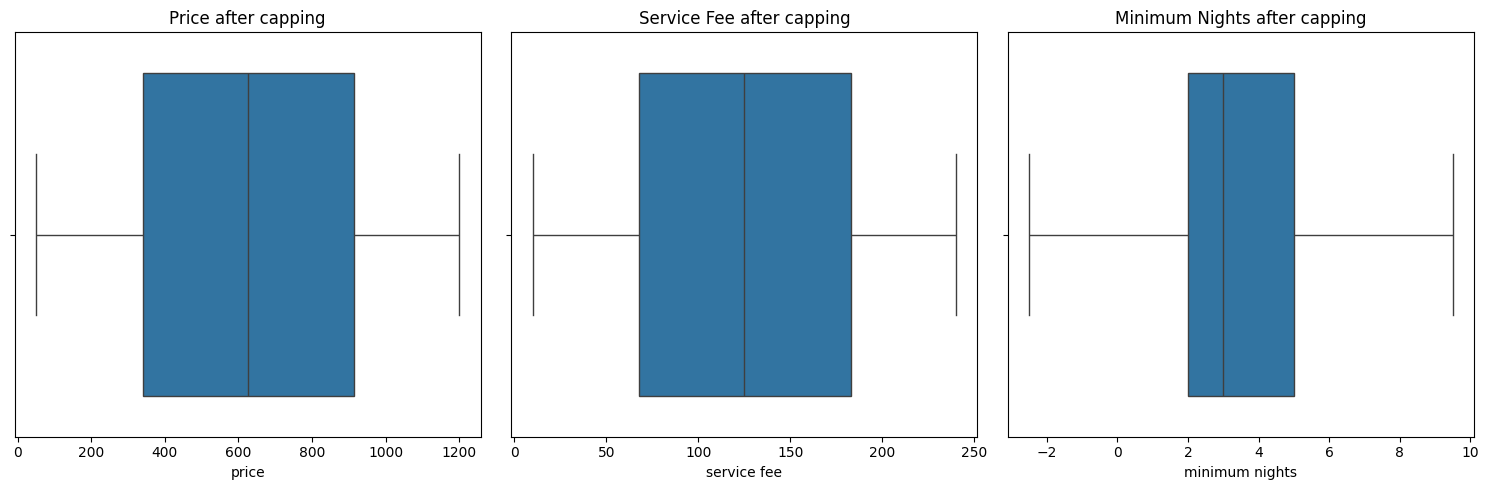

In [21]:
# Cap outliers in 'price' using IQR
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
df['price'] = df['price'].clip(lower=lower_bound_price, upper=upper_bound_price)

# Cap outliers in 'service fee' using IQR
Q1_service_fee = df['service fee'].quantile(0.25)
Q3_service_fee = df['service fee'].quantile(0.75)
IQR_service_fee = Q3_service_fee - Q1_service_fee
lower_bound_service_fee = Q1_service_fee - 1.5 * IQR_service_fee
upper_bound_service_fee = Q3_service_fee + 1.5 * IQR_service_fee
df['service fee'] = df['service fee'].clip(lower=lower_bound_service_fee, upper=upper_bound_service_fee)

# Cap outliers in 'minimum nights' using IQR
Q1_minimum_nights = df['minimum nights'].quantile(0.25)
Q3_minimum_nights = df['minimum nights'].quantile(0.75)
IQR_minimum_nights = Q3_minimum_nights - Q1_minimum_nights
lower_bound_minimum_nights = Q1_minimum_nights - 1.5 * IQR_minimum_nights
upper_bound_minimum_nights = Q3_minimum_nights + 1.5 * IQR_minimum_nights
df['minimum nights'] = df['minimum nights'].clip(lower=lower_bound_minimum_nights, upper=upper_bound_minimum_nights)

# Re-visualize the distributions to confirm the changes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['price'])
plt.title('Price after capping')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['service fee'])
plt.title('Service Fee after capping')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['minimum nights'])
plt.title('Minimum Nights after capping')

plt.tight_layout()
plt.show()

## Standardize/transform data (optional)

### Subtask:
Apply standardization or transformations to numerical columns if required for further analysis.


**Reasoning**:
Select numerical columns and apply log transformation to skewed columns and standardization to all numerical columns, then display the head and descriptive statistics of the transformed/standardized data.



In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numerical_cols = df.select_dtypes(include=['number']).columns

# Apply log transformation to 'price' and 'service fee' as they appear skewed
df['price_log'] = np.log1p(df['price'])
df['service_fee_log'] = np.log1p(df['service fee'])

# Select columns for standardization (excluding original price and service fee)
cols_to_standardize = numerical_cols.drop(['price', 'service fee'])

# Add log-transformed columns to the list for standardization
cols_to_standardize = cols_to_standardize.tolist() + ['price_log', 'service_fee_log']

# Apply standardization
scaler = StandardScaler()
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

# Display head and descriptive statistics of transformed/standardized columns
print(df[cols_to_standardize].head())
print(df[cols_to_standardize].describe())

         id   host id       lat      long  instant_bookable  \
0 -1.761872  1.080496 -1.417813 -0.474127         -0.995430   
1 -1.761820  0.110488  0.466381 -0.700579         -0.995430   
4 -1.761722  1.501839  1.263343  0.089620         -0.995430   
5 -1.761697 -0.129098  0.360747 -0.526370          1.004591   
7 -1.761629  1.459234 -0.718497 -0.148155         -0.995430   

   Construction year  minimum nights  number of reviews  reviews per month  \
0           1.304101        1.960953          -0.447738          -0.666659   
1          -0.952660        1.960953           0.245126          -0.569576   
4          -0.605466        1.960953          -0.447738          -0.729477   
5           0.088922       -0.240185           0.803266          -0.449650   
7          -0.605466        1.960953           0.322110          -0.558154   

   review rate number  calculated host listings count  availability 365  \
0            0.561890                       -0.034946          1.076713   
1 

## Summary:

### Data Analysis Key Findings

*   The initial attempts to read the "Airbnb\_Open\_Data.csv" file as a standard CSV with various encodings failed, indicating the file was not in a typical CSV format.
*   The file was successfully read as an Excel file using `pd.read_excel`, revealing its true format despite the `.csv` extension.
*   Several columns initially contained missing values; 'license' and 'house\_rules' had over 50% missing data, while others had less than 16%.
*   Two columns, 'license' and 'house\_rules', were dropped due to the high percentage of missing values. Rows with any remaining missing values were also dropped, resulting in a dataframe with no missing values.
*   The 'price' and 'service fee' columns were already of a numeric data type (`float64`), and the 'last review' column was already of a datetime type (`datetime64[ns]`), so no type conversion was necessary for these columns.
*   Initially, there were 466 duplicate rows, which were successfully removed, resulting in a dataframe with no duplicate rows.
*   Box plots revealed potential outliers in several numerical columns, particularly 'price', 'service fee', and 'minimum nights'.
*   Outliers in the 'price', 'service fee', and 'minimum nights' columns were addressed by capping values using the Interquartile Range (IQR) method.
*   Log transformations were applied to the 'price' and 'service fee' columns due to their skewed distributions.
*   All numerical columns, including the log-transformed 'price' and 'service fee', were standardized using `StandardScaler`.

### Insights or Next Steps

*   The dataset initially presented challenges in loading due to its incorrect file extension, highlighting the importance of verifying file formats.
*   The chosen method of dropping rows with missing values after removing columns with substantial missingness resulted in a complete, clean dataset ready for analysis. Further analysis could explore the impact of this data removal on the overall sample representation.
